# [실습] 단변량분석 종합실습 : 직원이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, 	|	범주	|Yes , No		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
attrition = pd.read_csv(path)
attrition.drop(['Education','EducationField', 'EnvironmentSatisfaction', 'JobRole', 'JobInvolvement','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
               , axis = 1, inplace = True)
attrition.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,Married,11691,No,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,Single,9362,No,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,Married,13348,No,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,Married,17048,No,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,Divorced,4127,No,18,4,1,7,3


## 숫자형 변수 : 

### ① Age

In [3]:
var= 'Age'

1) 변수의 비즈니스 의미

> 직원 나이

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [4]:
attrition[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [5]:
attrition[var].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

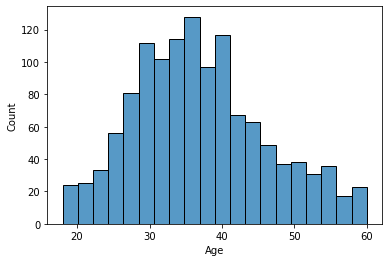

In [6]:
sns.histplot(attrition[var], bins = 20)
plt.show()

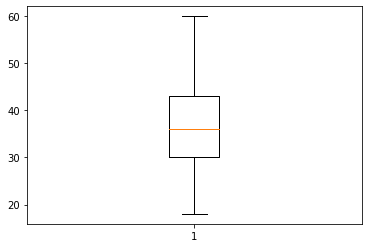

[30. 18.]
[43. 60.]


In [7]:
box = plt.boxplot(attrition[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 30대가 주축을 이루고 있음
* 18세 : 입사 가능 연령
* 60세 : 정년
* 40세 이후에 조금은 급격히 줄어드는 것으로 보아, 이때가 퇴사를 많이 하는 시점으로 보임. (보통 대기업에서 40대에 승진에서 누락되는 사람들, 새로운 분야로 진출하려는 사람들, 창업자들이 많아짐)

7) 추가 분석해 볼 사항이 있나요?

* 적절한(단순히 10살 단위가 아닌) 연령대로 분할하고, 연령대 별로 이직여부(이직율)을 검토해볼 필요가 있음
    * 직원들의 라이프사이클 파악 필요. 대졸, 입사 2~3년차, 5년차, 7년차 등 승진 및 이직을 고려하는 일반적인 시기 등 감안

### ② DistanceFromHome	

1) 변수의 비즈니스 의미

 * 직원의 거주지와 회사와의 거리

2) 숫자, 범주?

- 숫자

3) NaN 존재 유무 및 조치방안

In [8]:
attrition["DistanceFromHome"].isna().sum()

54

- nan값 존재하므로 평균으로 채움

In [9]:
attrition["DistanceFromHome"].fillna(attrition["DistanceFromHome"].mean(), inplace = True)

In [10]:
attrition["DistanceFromHome"].isna().sum()

0

4) 기초통계량(수치화)

In [11]:
attrition["DistanceFromHome"].describe()

count    1250.000000
mean        9.258361
std         7.987539
min         1.000000
25%         2.000000
50%         7.000000
75%        13.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포 확인(시각화)

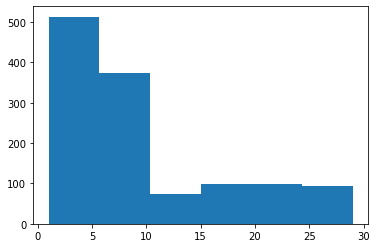

In [12]:
plt.hist(attrition["DistanceFromHome"], bins = 6)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 보통 직원들이 집과 회사를 10마일 안에서 많이 거주하고 있는 것으로 보임
- 대부분 직원들이 회사와 가까이에 거주하는 것으로 보임

7) 추가 분석해 볼 사항이 있나요?

- 이직을 한 사람 기준으로 집과 직장과의 거리 분포

In [13]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [14]:
sub_df["DistanceFromHome"].describe()

count    200.000000
mean      10.736459
std        8.466094
min        1.000000
25%        3.000000
50%        9.000000
75%       17.000000
max       29.000000
Name: DistanceFromHome, dtype: float64

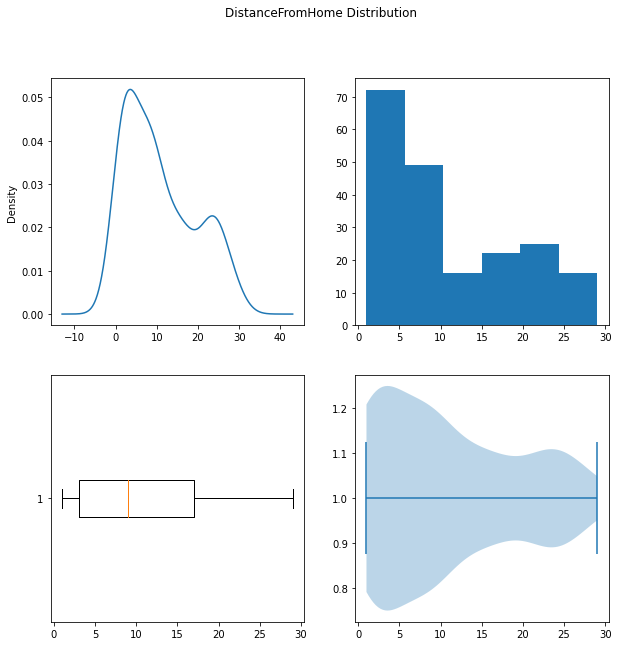

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
pd.Series(sub_df["DistanceFromHome"]).plot(kind='kde')

plt.subplot(2,2,2)
plt.hist(sub_df["DistanceFromHome"], bins= 6)

plt.subplot(2,2,3)
plt.boxplot(sub_df["DistanceFromHome"], vert = False)

plt.subplot(2,2,4)
plt.violinplot(sub_df["DistanceFromHome"], vert= False)

plt.suptitle('DistanceFromHome Distribution')
plt.show()


- 이직을 한 사람들의 집과 회사의 평균 거리는 약 10마일인 것으로 보아, 이직하는 기준에서 집과 회사의 거리는 큰 비중이 없을 것으로 판단된다.

### ③ MonthlyIncome

1) 변수의 비즈니스 의미

- 월급

2) 숫자, 범주?

숫자

3) NaN 존재 유무 및 조치방안

In [16]:
attrition["MonthlyIncome"].isna().sum()

0

4) 기초통계량(수치화)

In [17]:
attrition["MonthlyIncome"].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포 확인(시각화)

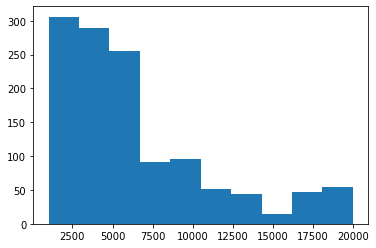

In [18]:
plt.hist(attrition["MonthlyIncome"], bins = 10)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 직원들의 평균 월급은 약 6500달러이다.
- 분포를 확인 했을 때, 왼쪽으로 많이 치우친 것과 50% 이상의 직원들이 5000달러도 미만으로 받는 것으로 보아 대부분의 직원들이 평균보다 많은 월급을 받지 못한다.

7) 추가 분석해 볼 사항이 있나요?

- 이직한 사람들의 월급 현황

In [19]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [20]:
sub_df["MonthlyIncome"].describe()

count      200.000000
mean      4738.125000
std       3444.320891
min       1009.000000
25%       2386.750000
50%       3424.000000
75%       6013.250000
max      19859.000000
Name: MonthlyIncome, dtype: float64

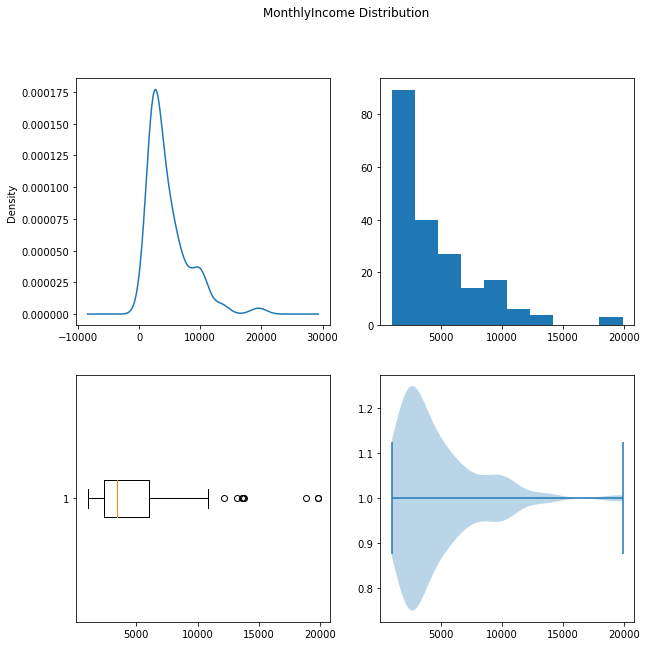

In [21]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
pd.Series(sub_df["MonthlyIncome"]).plot(kind='kde')

plt.subplot(2,2,2)
plt.hist(sub_df["MonthlyIncome"], bins= 10)

plt.subplot(2,2,3)
plt.boxplot(sub_df["MonthlyIncome"], vert = False)

plt.subplot(2,2,4)
plt.violinplot(sub_df["MonthlyIncome"], vert= False)

plt.suptitle('MonthlyIncome Distribution')
plt.show()


- 이직한 사람들의 평균 연봉이 약 4700달러인 것과, 분포를 확인 했을 때 왼쪽으로 치운 것으로 보아, 이직한 대부분의 직원들의 연봉이 낮은 편이였다고 유추할 수 있다.

### ④ PercentSalaryHike

1) 변수의 비즈니스 의미

- 전년대비 급여인상율

2) 숫자, 범주?

- 숫자

3) NaN 존재 유무 및 조치방안

In [22]:
attrition["PercentSalaryHike"].isna().sum()

0

4) 기초통계량(수치화)

In [23]:
attrition["PercentSalaryHike"].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

5) 분포 확인(시각화)

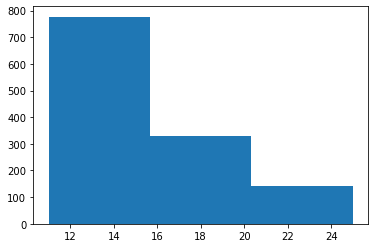

In [24]:
plt.hist(attrition["PercentSalaryHike"], bins = 3)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 전년 대비 급여 인상률의 평균은 15%이고, 분포를 보았을 때, 왼쪽으로 치우친 것을 보아 대부분의 직원들은 약 15% 안에서 급여 인상이 됐을 것으로 보인다.

7) 추가 분석해 볼 사항이 있나요?

- 이직한 사람들의 전년 대비 급여 인상률

In [25]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [26]:
sub_df["PercentSalaryHike"].describe()

count    200.000000
mean      15.265000
std        3.823332
min       11.000000
25%       12.000000
50%       14.000000
75%       18.000000
max       25.000000
Name: PercentSalaryHike, dtype: float64

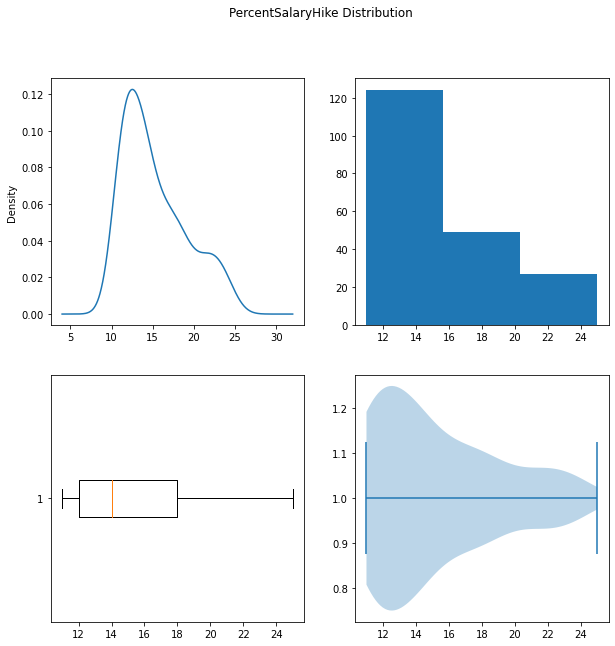

In [27]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
pd.Series(sub_df["PercentSalaryHike"]).plot(kind='kde')

plt.subplot(2,2,2)
plt.hist(sub_df["PercentSalaryHike"], bins= 3)

plt.subplot(2,2,3)
plt.boxplot(sub_df["PercentSalaryHike"], vert = False)

plt.subplot(2,2,4)
plt.violinplot(sub_df["PercentSalaryHike"], vert= False)

plt.suptitle('PercentSalaryHike Distribution')
plt.show()

- 마찬가지로 이직한 직원의 전년 대비 급여 인상률 또한 15% 안에서 가장 많이 분포하고 있는 것으로 보인다.
- 대부분의 이직한 직원들의 높은 급여 인상률을 받지 못한 것으로 유추할 수도 있지만, 평균적으로 높은 급여를 받는 직원이 많지 않기 때문에 다른 요소도 고려해봐야할 것 같다.

### ⑤ TotalWorkingYears

1) 변수의 비즈니스 의미

- 총 경력 연수

2) 숫자, 범주?

- 숫자

3) NaN 존재 유무 및 조치방안

In [28]:
attrition["TotalWorkingYears"].isna().sum()

0

4) 기초통계량(수치화)

In [29]:
attrition["TotalWorkingYears"].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

5) 분포 확인(시각화)

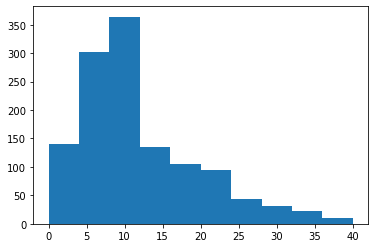

In [30]:
plt.hist(attrition["TotalWorkingYears"])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 10~15년차 경력을 가진 직원이 가장 많다.
- 75% 이상이 15년차인 것과, 분포를 봤을때 왼쪽으로 치우친 것으로 보아, 전반적으로 경력이 쌓일 수록 직원 수가 줄어드는 것을 알 수 있다.

7) 추가 분석해 볼 사항이 있나요?

- 이직한 직원의 총 경력 연수 비율

In [31]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [32]:
sub_df["TotalWorkingYears"].describe()

count    200.00000
mean       8.03500
std        6.87825
min        0.00000
25%        3.00000
50%        7.00000
75%       10.00000
max       40.00000
Name: TotalWorkingYears, dtype: float64

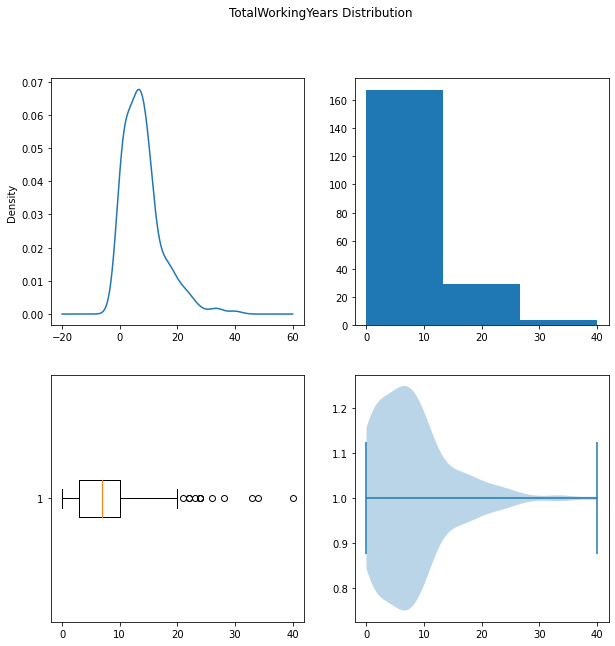

In [33]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
pd.Series(sub_df["TotalWorkingYears"]).plot(kind='kde')

plt.subplot(2,2,2)
plt.hist(sub_df["TotalWorkingYears"], bins= 3)

plt.subplot(2,2,3)
plt.boxplot(sub_df["TotalWorkingYears"], vert = False)

plt.subplot(2,2,4)
plt.violinplot(sub_df["TotalWorkingYears"], vert= False)

plt.suptitle('TotalWorkingYears Distribution')
plt.show()

- 이직한 사람들의 평균 경력 연수가 8년인 것으로 보아, 평균 경력 연수가 10년 이하인 사람들이 이직하는 사람들이 많다.
- 경력 연수가 높지 않은 청년들이 많이 이직하는 것으로 유추할 수 있다.

## 범주형 변수

### ① Attrition

In [34]:
var = 'Attrition'

1) 변수의 비즈니스 의미

> 직원 이직여부

2) 숫자, 범주?

In [35]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> * 범주형 데이터
* 범주 종류 Yes , No

3) NaN 존재 유무 및 조치방안

In [36]:
attrition[var].isna().sum()

0

> * NA 없음
* 당연히 Target이기에 NA가 있으면 안됨!


4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

In [37]:
# 변환 코드
# attrtion['Attrition'] = np.where(attrtion['Attrition'] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [38]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

No     1050
Yes     200
Name: Attrition, dtype: int64
No     0.84
Yes    0.16
Name: Attrition, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


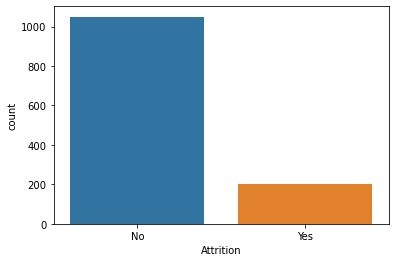

In [39]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 1196명 직원
* 이직자 : 195명, 이직율 : 0.163
* 이직율이 16.3% 는 적정한가? 동종 업계 수준은? 전년대비?

8) 추가 분석해 볼 사항이 있나요?

> * Attribute가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② OverTime	

1) 변수의 비즈니스 의미

- 야근여부

2) 숫자, 범주?

In [40]:
attrition["OverTime"].unique()

array(['No', 'Yes'], dtype=object)

- 범주

3) NaN 존재 유무 및 조치방안

In [41]:
attrition["OverTime"].isna().sum()

0

4) 가변수화 필요 여부

- Yes, No 이기 때문에 필요

5) 기초통계량(수치화)

In [42]:
print(attrition["OverTime"].value_counts())
print(attrition["OverTime"].value_counts()/ len(attrition["OverTime"]))

No     896
Yes    354
Name: OverTime, dtype: int64
No     0.7168
Yes    0.2832
Name: OverTime, dtype: float64


6) 분포 확인(시각화)

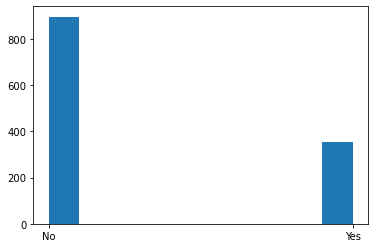

In [43]:
plt.hist(attrition["OverTime"])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 야근하는 사람보다 야근하지 않는 사람들이 2배 이상이다.

8) 추가 분석해 볼 사항이 있나요?

- 이직한 사람들의 야근 비율

In [44]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [45]:
print(sub_df["OverTime"].value_counts())
print(sub_df["OverTime"].value_counts()/ len(sub_df["OverTime"]))

Yes    107
No      93
Name: OverTime, dtype: int64
Yes    0.535
No     0.465
Name: OverTime, dtype: float64


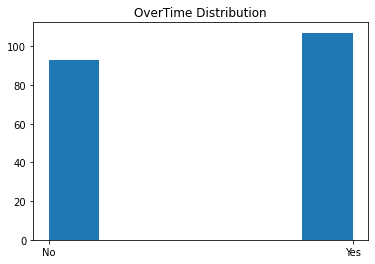

In [46]:
plt.hist(sub_df["OverTime"], bins= 6)
plt.title('OverTime Distribution')
plt.show()

- 모든 직원들의 야근 비율에서는 야근 하지 않는 사람들이 야근 하는 사람보다 2배 이상으로 많았다면, 이직한 사람들의 야근 비율은 거의 50%인 것으로 보아 이직 원인에 야근 여부가 중요한 요소라고 유추할 수 있다.

### ③ MaritalStatus

1) 변수의 비즈니스 의미

- 결혼상태

2) 숫자, 범주?

In [47]:
attrition["MaritalStatus"].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

- 범주

3) NaN 존재 유무 및 조치방안

In [48]:
attrition["OverTime"].isna().sum()

0

4) 가변수화 필요 여부

- 필요

5) 기초통계량(수치화)

In [49]:
print(attrition["MaritalStatus"].value_counts())
print(attrition["MaritalStatus"].value_counts()/ len(attrition["MaritalStatus"]))

Married     570
Single      404
Divorced    276
Name: MaritalStatus, dtype: int64
Married     0.4560
Single      0.3232
Divorced    0.2208
Name: MaritalStatus, dtype: float64


6) 분포 확인(시각화)

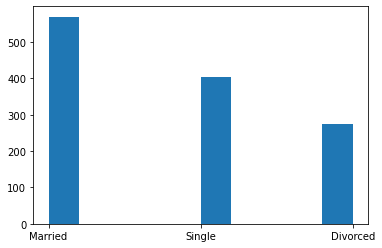

In [50]:
plt.hist(attrition["MaritalStatus"])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 결혼 > 미혼 > 이혼 순으로 많다.

8) 추가 분석해 볼 사항이 있나요?

- 이직한 사람들의 결혼 여부 상태

In [51]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [52]:
print(sub_df["MaritalStatus"].value_counts())
print(sub_df["MaritalStatus"].value_counts()/ len(sub_df["MaritalStatus"]))

Single      108
Married      69
Divorced     23
Name: MaritalStatus, dtype: int64
Single      0.540
Married     0.345
Divorced    0.115
Name: MaritalStatus, dtype: float64


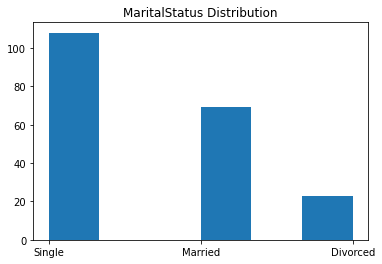

In [53]:
plt.hist(sub_df["MaritalStatus"], bins= 6)
plt.title('MaritalStatus Distribution')
plt.show()

- 미혼 > 결혼 > 이혼 순으로 많다.
- 이직한 사람들은 미혼이 50% 이상인 것으로 보아 미혼인 사람들이 이직 하는 비율이 높을 것이라고 생각한다.

### ④ JobSatisfaction

1) 변수의 비즈니스 의미

- 직무 만족도

2) 숫자, 범주?

In [54]:
attrition["JobSatisfaction"].unique()

array([3, 4, 1, 2], dtype=int64)

- 범주

3) NaN 존재 유무 및 조치방안

In [55]:
attrition["JobSatisfaction"].isna().sum()

0

4) 가변수화 필요 여부

- 필요없다

5) 기초통계량(수치화)

In [56]:
print(attrition["JobSatisfaction"].value_counts())
print(attrition["JobSatisfaction"].value_counts()/ len(attrition["JobSatisfaction"]))

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


6) 분포 확인(시각화)

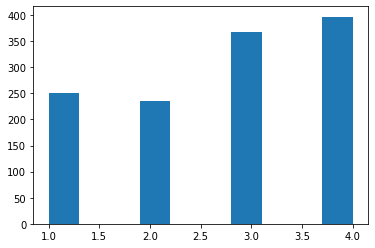

In [57]:
plt.hist(attrition["JobSatisfaction"])

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 3~4 점을 준 직원이 약 50% 인 것으로 보아 직원의 직무 만족도가 나쁜편은 아닌 것 같다.

8) 추가 분석해 볼 사항이 있나요?

- 이직한 사람들의 직무 만족도

In [58]:
sub_df = attrition.loc[attrition["Attrition"] == 'Yes']
sub_df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
5,Yes,22,Travel_Frequently,Research & Development,4.0,593,Male,3,Single,3894,No,16,3,0,4,3
10,Yes,24,Travel_Rarely,Sales,3.0,720,Female,3,Single,4577,No,14,1,0,4,3
12,Yes,33,Travel_Rarely,Research & Development,15.0,582,Male,3,Married,13610,Yes,12,4,0,15,4
18,Yes,58,Travel_Frequently,Research & Development,2.0,918,Male,4,Divorced,2380,Yes,14,4,1,3,2
22,Yes,32,Travel_Rarely,Research & Development,7.0,1309,Male,3,Married,4883,No,18,1,1,10,3


In [59]:
print(sub_df["JobSatisfaction"].value_counts())
print(sub_df["JobSatisfaction"].value_counts()/ len(sub_df["JobSatisfaction"]))

3    60
1    53
4    48
2    39
Name: JobSatisfaction, dtype: int64
3    0.300
1    0.265
4    0.240
2    0.195
Name: JobSatisfaction, dtype: float64


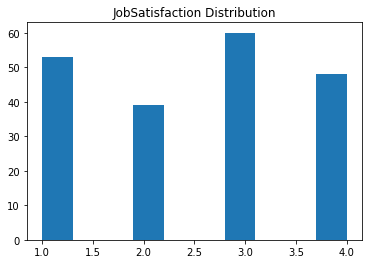

In [60]:
plt.hist(sub_df["JobSatisfaction"])
plt.title('JobSatisfaction Distribution')
plt.show()

- 이직한 사람들의 직무 만족도도 3~4점이 약 50%로 높은 비율을 가지고 있는 편이지만, 1점으로 평가한 비율이 이전에 모든 직원의 직무 만족도에서이 1점 비율보다 상당히 많이 증가한 것으로 보인다.
- 1점으로 평가한 직원이 확실히 상대적으로 높아진 것으로 보아 이직 여부와 연관이 있는 요소라고 생각한다.